# House_prediction_data_manipulat

In [1]:
# necessary libraries
# Dependency imports
import re
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('data/cleaned_data.csv')
X = df.drop('price', axis=1)
y = df['price']

In [3]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,total_sqft,total_sqft15
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,2014,10,13,6830,6990
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,2014,12,9,9812,9329
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,2015,2,25,10770,10782
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,2014,12,9,6960,6360
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,2015,2,18,9760,9303


<Axes: ylabel='price'>

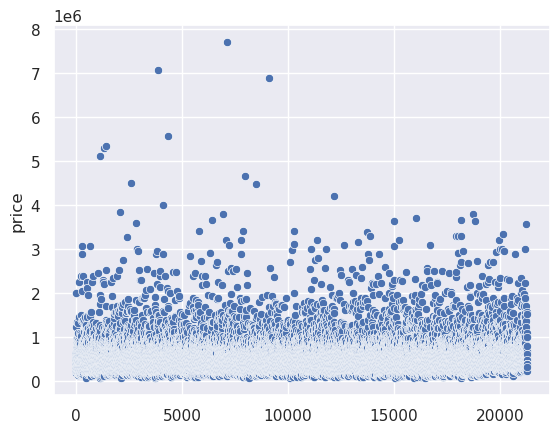

In [5]:
sns.scatterplot(data=df['price'])

In [8]:
df['price'].describe()

count    2.126700e+04
mean     5.378501e+05
std      3.668515e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64

In [11]:
#Another method to findout q1, q2 and q3
df.price.quantile([0.25,0.50,0.75])

0.25    320000.0
0.50    450000.0
0.75    640000.0
Name: price, dtype: float64

To find out IQR

In [12]:
Q1=320000.0
Q3=640000.0
IQR=Q3-Q1
print("So,IQR of our totalPrice Features is",IQR)

So,IQR of our totalPrice Features is 320000.0


In [13]:
#Let's Calculate the High and Low Value in a totalPrice Features
High=Q3+1.5*IQR
Low=Q1-1.5*IQR
print("High value of our totalPrice Features is",High)
print("Low value of our totalPrice Features is",Low)

High value of our totalPrice Features is 1120000.0
Low value of our totalPrice Features is -160000.0


In [14]:
data = df.copy()

In [16]:
#Let's remove the outlier
data=data[data['price']<=High]
data=data[data['price']>=Low]

<Axes: ylabel='price'>

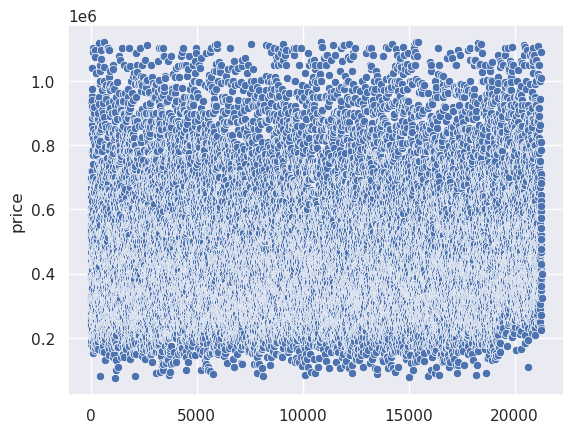

In [19]:
sns.scatterplot(data=data['price'])

In [20]:
print(data.shape)
print(df.shape)

(20138, 25)
(21267, 25)


In [21]:
print("Total outlier Removed =",data.shape[0]-df.shape[0])

Total outlier Removed = -1129


In [22]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day', 'total_sqft',
       'total_sqft15'],
      dtype='object')

In [24]:
X=data.drop(['price'],axis=1)
y=data['price']

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[0.00859553 0.00825255 0.0239384  0.13051996 0.00955056 0.01283003
 0.00336826 0.01924055 0.01292021 0.16075337 0.05901677 0.01425323
 0.03043081 0.00429141 0.02188135 0.32068321 0.02735189 0.08356616
 0.00832129 0.00656103 0.00717965 0.00758556 0.01049142 0.00841679]


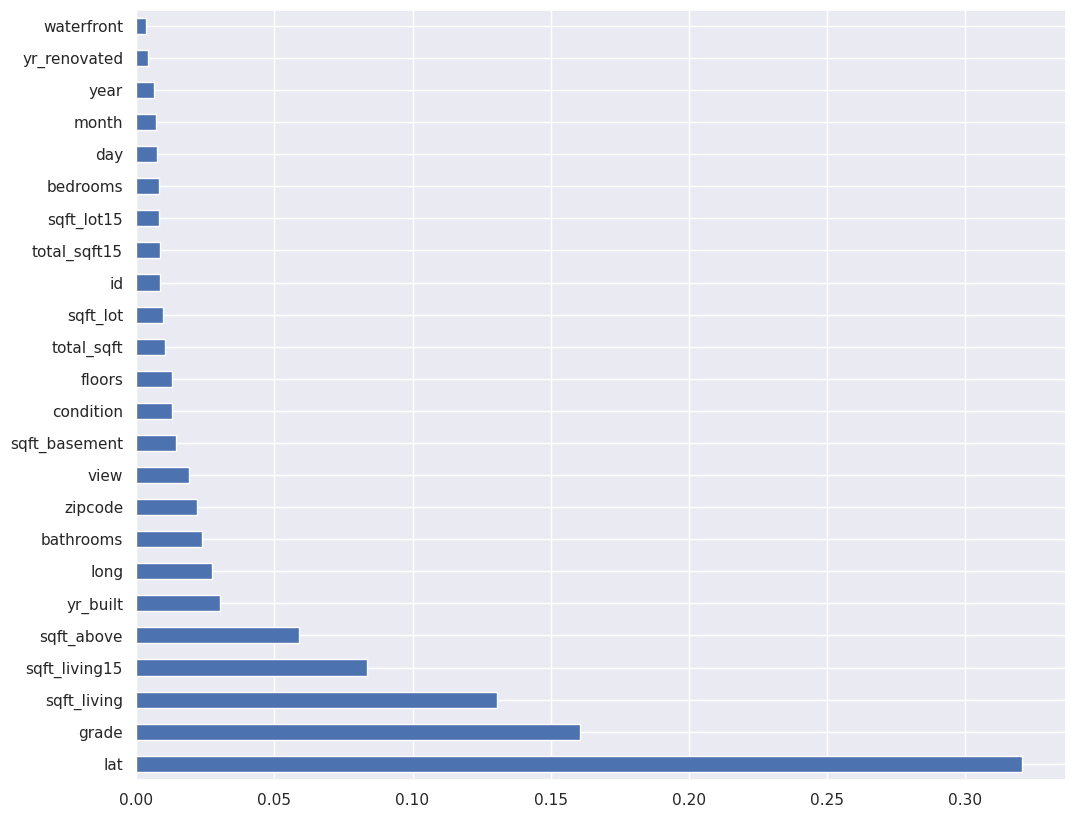

In [27]:
plt.figure(figsize=(12,10))
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(30).plot(kind='barh')
plt.show()

here we have top 10 features for the model

1. lat

2. grade

3. sqft_living

4. sqft_living15

5. sqft_above

6. yr_built

7. long

8. bathrooms

9. zipcode

10. view

## Data Normalization

In [30]:
from sklearn.preprocessing import StandardScaler

scaling=StandardScaler()

# I want to scale all numeric columns except 'id', 'zipcode', 'lat', 'long'
col_for_normalization = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 
                     'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 
                     'sqft_lot15', 'year', 'month', 'day', 'total_sqft', 'total_sqft15']

data[col_for_normalization]=scaling.fit_transform(data[col_for_normalization])

In [31]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,total_sqft,total_sqft15
0,7129300520,-1.219602,-0.360264,-1.474021,-1.024220,-0.368444,-0.882793,0,-0.265547,-0.630613,...,98178,47.5112,-122.257,-0.939298,-0.289399,-0.690134,1.098833,-0.312788,-0.420250,-0.322666
1,6414100192,0.304766,-0.360264,0.287004,0.789831,-0.250721,0.977186,0,-0.265547,-0.630613,...,98125,47.7210,-122.319,-0.368044,-0.165201,-0.690134,1.740754,-0.777156,-0.202960,-0.177812
2,5631500400,-1.421662,-1.456021,-1.474021,-1.559300,-0.046776,-0.882793,0,-0.265547,-0.630613,...,98028,47.7379,-122.233,1.313076,-0.138788,1.448994,-1.468851,1.080317,-0.133154,-0.087827
3,2487200875,0.623046,0.735492,1.343619,-0.006263,-0.416510,-0.882793,0,-0.265547,2.457736,...,98136,47.5208,-122.393,-0.906655,-0.329986,-0.690134,1.740754,-0.777156,-0.410777,-0.361682
4,1954400510,0.169738,-0.360264,-0.065201,-0.371684,-0.188754,-0.882793,0,-0.265547,-0.630613,...,98074,47.6168,-122.045,-0.188507,-0.173693,1.448994,-1.468851,0.267672,-0.206750,-0.179422


In [32]:
data.to_csv("data/Data_For_Model.csv")